In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
df=pd.read_csv('Jato Extract EGB 20221130.csv')

/var/folders/dl/9lzg8y6s5kz9st666f8z05lw0000gn/T/ipykernel_516/2265047516.py:1: DtypeWarning: Columns (136,204,255,304,307,311,317,331,336,353,392) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Jato Extract EGB 20221130.csv')


In [36]:
df.head(3)

,UID,Country,Make,Model,Version,Model gener,Data status,Data date,Body type,Doors,Liters,kW,hp/PS,Fuel,Powertrain type,type,Price curr,Price,Price + del,Cty price,Charges,nat tax 2 name,nat tax 2 amnt,nat tax 3 name,nat tax 3 amnt,Version state,Seating cap,Emis ctrl level,std met,CO2 g/km cm,WLTP emissions,testing type,comb,comb LV,comb HV,Power,max torq Nm,Secondary power,hp/PS.1,max torque nm,Start/Stop,Engine,# of cyls,Electric motor,motor number,pwr motor kW,max torqe Nm,Hybrid type,hybrid type,Plug-in,Elec drvn whls,elec drvn whls,Performance,max speed(km/h),acc 0-100 km/h,max elec (km/h),Elec pwr srce,range (km),WLTP elec range,test type,comb km,comb km LV,comb km HV,WLTP EEC,comb.1,comb LV.1,comb HV.1,test type.1,Charging cnnctr,type.1,Charging info,scenario,max kW sup,Battery subscrp,batt subs price,Energy recup,Solar power,Pow consumption,cmb (kWh/100km),Rem batt mgmt,batt stat check,rem chrge act,rem chrg tim,rem bt preheat,chrg cptn alrt,Remot eng start,Block htr,Fuel use (new),standard,combinedl/100km,Comb l/100km LV,Comb l/100km HV,gas combined kg,gas ctry/hwy kg,Particle filter,Trans,# of speeds,mode sel (AT),trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,months,Warr battery,duration (mth),Hill holder,Diff lock,locn,L.S.D.,locn.1,type.2,Ter type sel,Underbdy protn,locn.2,4-wheel steer,Resp susp,driver select,type.3,Driver modes,inc eng map,inc steering,inc susp,Susp level,operation,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,act brakes,act steering,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,min act spd kph,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,location.1,type.6,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,digital,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,location.4,Anti sub airbag,location.5,Isofix preparat,ABS,Disc brakes,# of,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,peripheral,anti-lift,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,operation.1,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,fold to floor.1,electric fold.1,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,location.6,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,auto recirc,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,inc key,inc inet,inc phone,Power locks,operation.2,inc pwr wndos,auto locking,Smart card/key,type.9,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,locn.6,type.10,operation.4,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,R side windows,type.14,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,# of.1,brand name.1,cn 2 ext ent dv,ipod fr,USB fr,USB cnnctn rear,DVD/VCD,Int Mem/HD,stor cap (GB),Bluetooth,inc phone cx,inc music str,Nav systems,info. type,controls,display type,rem/por,scrn size (in),traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,location.9,digital tv,Internet,Voice system,inc aud player,inc phone.1,inc navigation,Traffic Info.,12v power,outlets,Mem adjust,Telematics,inc eng sht dwn,Adv At Clsn Nt,tracker syst,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss c

In [37]:
df.shape

(3471, 410)

In [38]:
df = df.loc[:, df.isnull().mean() < 0.2] #keep cols with less than 20% null

In [39]:
df.shape #298 0.2

(3471, 298)

In [40]:
df.nunique()

UID                3471
Country               1
Make                 44
Model               290
Version            2879
                   ... 
trim class.          14
Ext dimensions        1
O.A. length         372
Sec. fuel econo       2
msrp               2964
Length: 298, dtype: int64

In [41]:
df.describe()

,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length
count,3.471000e+03,3471.000000,3471.000000,3188.000000,3471.000000,3471.000000,3470.00000,3470.000000,3471.000000,3381.000000,3188.000000,3451.000000,3438.000000,3471.000000,3471.000000,3459.000000,2988.000000,3419.000000,3471.000000,3470.000000
mean,8.072120e+06,2.893402,4.643907,1.938049,163.469317,222.252665,277.93804,54.936599,5.007779,364.476782,4.220201,212.842944,8.168935,42.216076,3.834630,8.531078,10.543993,1657.226382,0.409104,4554.720461
std,6.049829e+05,2.029648,0.841960,0.814655,89.923657,122.279358,182.71078,1.866552,0.820274,169.288595,1.209135,32.655829,2.432078,19.182079,0.550891,4.012539,1.815315,372.645126,0.526276,333.647989
min,3.321000e+04,1.000000,2.000000,0.900000,48.000000,65.000000,0.00000,0.000000,2.000000,91.000000,2.000000,130.000000,2.700000,24.000000,2.000000,2.000000,7.000000,895.000000,0.000000,2695.000000
25%,8.071820e+06,1.000000,5.000000,1.500000,100.000000,136.000000,155.00000,55.000000,5.000000,240.000000,4.000000,190.000000,6.300000,36.000000,4.000000,6.000000,9.200000,1384.000000,0.000000,4368.000000
50%,8.199727e+06,2.000000,5.000000,2.000000,135.000000,184.000000,165.00000,55.000000,5.000000,320.000000,4.000000,209.000000,8.300000,36.000000,4.000000,8.000000,10.250000,1600.000000,0.000000,4580.000000
75%,8.285210e+06,4.000000,5.000000,2.000000,210.000000,286.000000,510.00000,55.000000,5.000000,450.000000,4.000000,235.000000,9.900000,36.000000,4.000000,10.000000,12.300000,1893.000000,1.000000,4762.000000
max,8.351369e+06,12.000000,5.000000,6.000000,620.000000,843.000000,540.00000,55.000000,9.000000,1470.000000,12.000000,341.000000,17.300000,120.000000,4.000000,35.000000,17.700000,2921.000000,2.000000,5469.000000


In [42]:
type(df['msrp'][0])

str

In [43]:
df["msrp"] = [float(str(i).replace(",", "")) for i in df["msrp"]]

/var/folders/dl/9lzg8y6s5kz9st666f8z05lw0000gn/T/ipykernel_516/4038738882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["msrp"] = [float(str(i).replace(",", "")) for i in df["msrp"]]


In [44]:
df["msrp"].dtype

dtype('float64')

In [45]:
df.dtypes

UID                  int64
Country             object
Make                object
Model               object
Version             object
                    ...   
trim class.         object
Ext dimensions      object
O.A. length        float64
Sec. fuel econo     object
msrp               float64
Length: 298, dtype: object

In [46]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data.shape[1], categorical_data.shape[1]

(21, 277)

In [47]:
numeric_data.corr()

,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
UID,1.000000,-0.067529,0.036268,-0.034573,0.015915,0.015946,-0.009704,0.460318,0.044908,0.006590,-0.019577,-0.052771,-0.013852,0.039876,0.005608,0.038865,0.075369,0.072813,-0.078693,0.044078,0.027712
Model gener,-0.067529,1.000000,-0.130991,0.051554,0.011581,0.011658,0.114095,-0.001785,-0.059567,-0.009534,0.045643,0.157063,-0.026138,0.034434,0.042479,0.027021,0.175872,-0.060726,0.009812,0.104214,0.059398
Doors,0.036268,-0.130991,1.000000,-0.398199,-0.321893,-0.322139,-0.297618,-0.014372,0.570668,-0.211237,-0.347600,-0.438746,0.371520,-0.053048,-0.057408,-0.100406,-0.066661,-0.010459,-0.078922,0.012273,-0.313447
Liters,-0.034573,0.051554,-0.398199,1.000000,0.846304,0.846515,0.644156,-0.020095,-0.143143,0.808548,0.942568,0.667419,-0.716263,0.085702,0.271182,0.556005,0.352931,0.692919,-0.020450,0.562936,0.809014
kW,0.015915,0.011581,-0.321893,0.846304,1.000000,0.999994,0.571562,-0.008128,-0.176507,0.896279,0.840047,0.679122,-0.855022,-0.025772,0.243293,0.577515,0.429298,0.715344,-0.054985,0.549640,0.887680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrn size (in),0.075369,0.175872,-0.066661,0.352931,0.429298,0.428998,0.330525,0.036203,-0.016560,0.466203,0.351448,0.322709,-0.418317,-0.004783,0.187013,0.345348,1.000000,0.510351,-0.044720,0.496595,0.434302
kerb wt (kg),0.072813,-0.060726,-0.010459,0.692919,0.715344,0.715436,0.505237,0.025934,0.227687,0.823046,0.648200,0.313171,-0.622221,-0.052128,0.259407,0.606598,0.510351,1.000000,-0.110022,0.764163,0.728265
facelift gen,-0.078693,0.009812,-0.078922,-0.020450,-0.054985,-0.055014,0.055676,-0.038161,-0.067455,-0.034910,-0.031151,0.095628,-0.007153,-0.048497,0.094258,-0.047437,-0.044720,-0.110022,1.000000,-0.014541,-0.094383
O.A. length,0.044078,0.104214,0.012273,0.562936,0.549640,0.549866,0.484066,0.016372,0.331154,0.641850,0.530284,0.438252,-0.500771,-0.062691,0.391554,0.530413,0.496595,0.764163,-0.014541,1.000000,0.599317


In [48]:
numeric_data.head()

,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
0,8310719,1,5,NaN,170,231,0.0,55.0,5,330.0,NaN,160.0,7.4,36,4,8.0,11.1,1940.0,0,4606.0,42150.0
1,8250150,1,5,NaN,170,231,0.0,55.0,5,330.0,NaN,160.0,7.4,36,4,8.0,11.1,1994.0,0,4606.0,45450.0
2,8133287,1,5,NaN,300,408,0.0,55.0,5,660.0,NaN,205.0,4.7,36,4,8.0,11.1,2113.0,0,4606.0,48550.0
3,8316264,1,5,NaN,350,476,0.0,55.0,5,680.0,NaN,205.0,4.4,36,4,8.0,11.1,2113.0,0,4606.0,53550.0
4,8166181,2,5,1.2,55,75,165.0,55.0,5,118.0,3.0,170.0,14.9,36,4,6.0,NaN,980.0,0,4055.0,19345.0


In [49]:
categorical_data.head()

,Country,Make,Model,Version,Data status,Data date,Body type,Fuel,Powertrain type,type,Price curr,Price,Price + del,Cty price,Charges,nat tax 2 name,nat tax 3 name,Version state,Emis ctrl level,std met,WLTP emissions,testing type,comb,Power,Secondary power,Start/Stop,Engine,Electric motor,Hybrid type,Plug-in,Elec drvn whls,Performance,Elec pwr srce,WLTP elec range,WLTP EEC,Charging cnnctr,Charging info,Battery subscrp,Energy recup,Solar power,Pow consumption,Rem batt mgmt,Block htr,Fuel use (new),standard,combinedl/100km,Particle filter,Trans,# of speeds,trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,Warr battery,Hill holder,Diff lock,L.S.D.,Ter type sel,4-wheel steer,Resp susp,Driver modes,Susp level,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,Isofix preparat,ABS,Disc brakes,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,Power locks,operation.2,inc pwr wndos,Smart card/key,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,brand name.1,cn 2 ext ent dv,USB fr,USB cnnctn rear,Int Mem/HD,Bluetooth,inc music str,Nav systems,info. type,controls,display type,traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,Internet,Voice system,12v power,Mem adjust,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss chrgng pd,Mob Integration,Apple CarPlay,Android Auto,MirrorLink,Other,Built-in Apps,Txt-sph/sph-txt,privacy glass,Vanity mirr,Lam. side wind,Paint,two-tone,Ext door handle,Cnvt. roof,Wind deflect,Roof rails,Chr/bright trim,Wheels.2,locn.10,rim type,rim diam (in),two-tone.1,structure wheel,Spare wheel,Tires,locn.11,tire wid,type.19,run flat,Weights,Crgo cov/r shlf,Load restraint,sld anc pts,hand-fr bt rlse,Auto dr close,Ins. class,Trim level,trim class.,Ext dimensions,Sec. fuel econo
0,GB,POLESTAR,2,BEV 69KWH SINGLE MOTOR AUTO STD RANGE,full specs,21-Jul-22,hatchback,elec,std,BEV,GBP,"42,150.00","43,095.00","43,150.00",std,VED (Standard Rate),FRF,spec chnge,std,NaN,std,ICE:BEV,"0,0:0,0",std,not avail,not avail,not avail,std,not avail,std,std,std,std,std,std,std,std,not avail,std,not avail,std,std,not avail,not avail,NaN,NaN,not avail,std,1,auto,no,automatic,front,std,none,front,no,std,std,std,not avail,not avail,not avail,not avail,not avail,std,not avail,std,not avail,std,no,NaN,std,std,opt,std,yes,yes,front and rear,yes,std,std,std,TFT Screen,no,opt,std,front:rear,sensor:sensor & camera,not avail,std,std,opt,std,projector beam,LED,std,s indctr lights:low beam:brake lights:rear lig...,std

In [50]:
df.groupby('trim class.')['msrp'].mean()

trim class.
B1    49812.930153
L1    49248.833132
M1    38345.011601
M2    43205.860597
M3    39723.122331
          ...     
S1    48697.681254
S2    50914.268075
S3    64022.315119
S4    59063.437500
S5    50567.857143
Name: msrp, Length: 14, dtype: float64

In [51]:
df.groupby(['Make','Model'])['msrp'].mean()

Make        Model            
ABARTH      500                  25039.948571
ALFA ROMEO  GIULIA               50498.670000
            STELVIO              55074.345000
            TONALE               42471.138333
ALPINA      B3                   70200.000000
                                     ...     
VOLVO       V90                  55587.500000
            V90 CROSS COUNTRY    57335.000000
            XC40                 47048.333333
            XC60                 57495.000000
            XC90                 72180.625000
Name: msrp, Length: 293, dtype: float64

In [52]:
nissan = df[(df.Make == 'NISSAN')]

In [53]:
nissan.dtypes

UID                  int64
Country             object
Make                object
Model               object
Version             object
                    ...   
trim class.         object
Ext dimensions      object
O.A. length        float64
Sec. fuel econo     object
msrp               float64
Length: 298, dtype: object

In [54]:
nj = df[(df.Make == 'NISSAN') & (df.Model == 'JUKE')]

In [55]:
nj.groupby('trim class.')['msrp'].mean() 

trim class.
B1    20410.000000
L1    28450.000000
M1    22760.000000
M2    24743.750000
M3    27103.333333
Name: msrp, dtype: float64

In [56]:
nj

,UID,Country,Make,Model,Version,Model gener,Data status,Data date,Body type,Doors,Liters,kW,hp/PS,Fuel,Powertrain type,type,Price curr,Price,Price + del,Cty price,Charges,nat tax 2 name,nat tax 2 amnt,nat tax 3 name,nat tax 3 amnt,Version state,Seating cap,Emis ctrl level,std met,WLTP emissions,testing type,comb,Power,max torq Nm,Secondary power,Start/Stop,Engine,# of cyls,Electric motor,Hybrid type,Plug-in,Elec drvn whls,Performance,max speed(km/h),acc 0-100 km/h,Elec pwr srce,WLTP elec range,WLTP EEC,Charging cnnctr,Charging info,Battery subscrp,Energy recup,Solar power,Pow consumption,Rem batt mgmt,Block htr,Fuel use (new),standard,combinedl/100km,Particle filter,Trans,# of speeds,trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,months,Warr battery,Hill holder,Diff lock,L.S.D.,Ter type sel,4-wheel steer,Resp susp,Driver modes,Susp level,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,Isofix preparat,ABS,Disc brakes,# of,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,Power locks,operation.2,inc pwr wndos,Smart card/key,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,# of.1,brand name.1,cn 2 ext ent dv,USB fr,USB cnnctn rear,Int Mem/HD,Bluetooth,inc music str,Nav systems,info. type,controls,display type,scrn size (in),traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,Internet,Voice system,12v power,Mem adjust,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss chrgng pd,Mob Integration,Apple CarPlay,Android Auto,MirrorLink,Other,Built-in Apps,Txt-sph/sph-txt,privacy glass,Vanity mirr,Lam. side wind,Paint,two-tone,Ext door handle,Cnvt. roof,Wind deflect,Roof rails,Chr/bright trim,Wheels.2,locn.10,rim type,rim diam (in),two-tone.1,structure wheel,Spare wheel,Tires,locn.11,tire wid,type.19,run flat,Weights,kerb wt (kg),Crgo cov/r shlf,Load restraint,sld anc pts,hand-fr bt rlse,Auto dr close,Ins. class,facelift gen,Trim level,trim class.,Ext dimensions,O.A. length,Sec. fuel econo,msrp
1781,7923787,GB,NISSAN,JUKE,1.0 DIG-T 114 VISIA,2,full specs,04-Oct-22,sprt utl veh,5,1.0,84,114,unleaded,std,combustion,GBP,"20,410.00","20,410.00","20,695.00",std,VED (Standard Rate),165.0,FRF,55.0,price chnge,5,std,EU6 D,std,ICE,134.0,std,200.0,not avail,std,std,3.0,not avail,not avail,not avail,not avail,std,180.0,10.7,not avail,not avail,not avail,not avail,not avail,not avail,std,not avail,not avail,not avail,not avail,std,ECE 99/100:WLTP ICE,":5,9",std,std,6,Man,no,manual,front,std,none,front,no,s

In [57]:
nj = nj[[i for i in nj if nj[i].nunique()>1]] #only keep columns with more than one unique value

In [58]:
nj.shape

(14, 85)

In [59]:
nj

,UID,Version,Data status,Data date,Liters,kW,hp/PS,type,Price,Price + del,Cty price,nat tax 2 amnt,testing type,comb,max torq Nm,Secondary power,# of cyls,Electric motor,Hybrid type,max speed(km/h),acc 0-100 km/h,Elec pwr srce,WLTP EEC,standard,combinedl/100km,# of speeds,trans dsc,g/change pad,Trans.,Warr battery,Driver modes,adap cruise con,stop/go fnctn,Overtake sensor,dr monitor,360 view cam,Park dist sys,location,type.5,Elec hand brake,Fr fog lts,location.2,rain sensor,auto-dimming,type.7,Elcly fldble ms,height type,heated.1,main seat mat,add seat mat,Frt ctr armrest,on shift knob,on doors,on I/P,air cond type,climate zones,operation.2,Smart card/key,electric,heated.3,Ele heat wdshld,# of.1,brand name.1,Nav systems,scrn size (in).1,location.8,Voice system,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Mob Integration,Txt-sph/sph-txt,privacy glass,two-tone,Chr/bright trim,rim type,rim diam (in),two-tone.1,structure wheel,tire wid,kerb wt (kg),Trim level,trim class.,msrp
1781,7923787,1.0 DIG-T 114 VISIA,full specs,04-Oct-22,1.0,84,114,combustion,"20,410.00","20,410.00","20,695.00",165.0,ICE,134.0,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,not avail,no,-,not avail,no,not avail,not avail,NaN,NaN,not avail,not avail,low beam:brake lights:rear lights:day tm rn lg...,no,no,plastic,not avail,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,4.20,Instru pan 1,not avail,not avail,not avail,not avail,not avail,not avail,not avail,not avail,no,not avail,steel:steel,16:16,no:no,no:no,215:215,1187.0,VISIA,B1,20410.0
1782,8011390,1.0 DIG-T 114 ACENTA,full specs,04-Oct-22,1.0,84,114,combustion,"22,010.00","22,010.00","22,295.00",165.0,ICE,134.0,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,not avail,no,-,not avail,no,not avail,std,rear,camera,not avail,not avail,s indctr lights:low beam:brake lights:rear lig...,no,no,plastic,opt,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,"4,20:8,00",Instru pan 1:Dash centre 1,std,std,not avail,not avail,std,std,std,not avail,no,not avail,steel:steel,17:17,yes:yes,yes:yes,215:215,1195.0,ACENTA,M1,22010.0
1783,7923785,1.0 DIG-T 114 ACENTA DCT,full specs,04-Oct-22,1.0,84,114,combustion,"23,510.00","23,510.00","23,795.00",165.0,ICE,137.0,200.0,not avail,3.0,not avail,not avail,180.0,12.1,not avail,not avail,ECE 99/100:WLTP ICE,":6,1",7,DCT,yes,automatic,not avail,not avail,no,-,not avail,no,not avail,std,rear,camera,not avail,not avail,s indctr lights:low beam:brake lights:rear lig...,no,no,plastic,opt,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,"4,20:8,00",Instru pan 1:Dash centre 1,std,std,not avail,not avail,std,std,std,not avail,no,not avail,steel:steel,17:17,yes:yes,yes:yes,215:215,1218.0,ACENTA,M1,23510.0
1784,8125610,1.0 DIG-T 114 N-CONNECTA,full specs,04-Oct-22,1.0,84,114,combustion,"24,010.00","24,010.00","24,295.00",165.0,ICE,134.0,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,std,no,-,not avail,no,opt,std,front:rear,sensor:sensor & camera,std,not avail,s indctr lights:low beam:brake lights:rear lig...,yes,yes,alloy & leather,std,manual:-,no:no,cloth,syn leather,std,chrome & lthr,synthtc leather,syn ltr,auto,1,card key,std,no:no:no:no,yes:yes,opt,6.0,none,std,"7,00:8,00",Instru pan 1:Dash centre 1,std,std,std,opt,std,std,std,std,no,not avail,alloy:alloy,17:17,yes:yes,no:no,215:215,1193.0,N-CONNECTA,M2,24010.0
1785,8011388,1.0 DIG-T 114 TEKNA,full specs,04-Oct-22,1.0,84,114,combustion,"25,510.00","25,510.00","25,795.00",165.0,ICE,137.0,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":6

In [60]:
nj.groupby(['Liters','type','trim class.'])['msrp'].mean()

Liters  type        trim class.
1.0     HEV         M2             22165.0
        combustion  B1             20410.0
                    L1             27660.0
                    M1             22760.0
                    M2             24760.0
                    M3             26260.0
1.6     HEV         L1             29240.0
                    M2             27290.0
                    M3             28790.0
Name: msrp, dtype: float64

In [61]:
nj.nunique()

UID             14
Version         14
Data status      2
Data date        2
Liters           2
                ..
tire wid         2
kerb wt (kg)    10
Trim level       6
trim class.      5
msrp            13
Length: 85, dtype: int64

In [62]:
nj.groupby('Trans.')['msrp'].mean()

Trans.
automatic    26796.111111
manual       23770.000000
Name: msrp, dtype: float64

In [63]:
nj.groupby('rain sensor')['msrp'].mean()

rain sensor
no     21976.666667
yes    26735.000000
Name: msrp, dtype: float64

In [64]:
nj.groupby('type.7')['msrp'].mean()

type.7
alloy & leather    26735.000000
plastic            21976.666667
Name: msrp, dtype: float64

In [65]:
nj.groupby('trim class.')['msrp'].mean()

trim class.
B1    20410.000000
L1    28450.000000
M1    22760.000000
M2    24743.750000
M3    27103.333333
Name: msrp, dtype: float64

In [66]:
sales = pd.read_csv('Sales Volume FRA & EGB 2019-2022 Brand+Model+version+Unique ID.csv')

/var/folders/dl/9lzg8y6s5kz9st666f8z05lw0000gn/T/ipykernel_516/3900206215.py:1: DtypeWarning: Columns (6,12,19,20,21,24,26,30,32,35,38,39,44,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('Sales Volume FRA & EGB 2019-2022 Brand+Model+version+Unique ID.csv')


In [67]:
sales.tail(1)

,Country,Make,Model,Version name,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov
46376,NaN,NaN,NaN,NaN,NaN,"315,705","252,748","681,795","347,635","375,963","452,790","328,124","221,079","516,452","331,574","328,680","360,139","283,444","246,890","317,218","25,317","116,436","378,912","353,704","190,782","495,883","311,551","239,804","318,975","216,608","183,748","465,226","281,969","297,755","385,591","238,968","156,074","349,108","224,756","237,682","266,701","217,973","174,347","390,530","227,872","251,178","312,013","219,682","160,237","366,388","259,310","276,813"


In [68]:
sales.shape

(46377, 52)

In [69]:
sales = sales.dropna()

In [70]:
sales_uk=sales[sales.Country == 'Great Britain']

In [71]:
sales_uk.head(1)

,Country,Make,Model,Version name,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov
21708,Great Britain,ABARTH,ABARTH:124 SPIDER,1.4 TURBO MULTIAIR 170HP,"7,661,566",8,0,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
sales_uk.dtypes

Country            object
Make               object
Model              object
Version name       object
Unique Identity    object
                    ...  
2022 Jul           object
2022 Aug           object
2022 Sep           object
2022 Oct           object
2022 Nov           object
Length: 52, dtype: object

In [73]:
col_list=[
       '2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr', '2019 May', '2019 Jun',
       '2019 Jul', '2019 Aug', '2019 Sep', '2019 Oct', '2019 Nov', '2019 Dec',
       '2020 Jan', '2020 Feb', '2020 Mar', '2020 Apr', '2020 May', '2020 Jun',
       '2020 Jul', '2020 Aug', '2020 Sep', '2020 Oct', '2020 Nov', '2020 Dec',
       '2021 Jan', '2021 Feb', '2021 Mar', '2021 Apr', '2021 May', '2021 Jun',
       '2021 Jul', '2021 Aug', '2021 Sep', '2021 Oct', '2021 Nov', '2021 Dec',
       '2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun',
       '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov']
# sales_uk['total_sales']=sales_uk[col_list].sum(axis=1)

In [74]:
sales_uk = sales_uk.astype(str)

In [75]:
sales_uk = sales_uk.apply(lambda x: x.str.replace(',', ''))

In [76]:
sales_uk[col_list] = sales_uk[col_list].apply(pd.to_numeric)

In [77]:
sales_uk['Unique Identity']=sales_uk['Unique Identity'].astype(int)

In [78]:
sales_uk.head(1)

,Country,Make,Model,Version name,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov
21708,Great Britain,ABARTH,ABARTH:124 SPIDER,1.4 TURBO MULTIAIR 170HP,7661566,8,0,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
sales_uk['total_sales']=sales_uk[col_list].sum(axis=1)

In [80]:
sales_uk['total_sales']=sales_uk['total_sales'].astype(int)

In [81]:
nissan_sales_uk = sales_uk[sales_uk.Make=='NISSAN']

In [82]:
nissan_sales_uk['Unique Identity'].nunique()

275

In [83]:
nissan_sales_uk.dtypes

Country            object
Make               object
Model              object
Version name       object
Unique Identity     int64
                    ...  
2022 Aug            int64
2022 Sep            int64
2022 Oct            int64
2022 Nov            int64
total_sales         int64
Length: 53, dtype: object

In [84]:
nissan_sales_and_trim_uk = nissan_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [85]:
nissan_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.']].sort_values(by='total_sales',ascending=False)[:20]

,Make_x,Model_x,Version name,Unique Identity,total_sales,trim class.
227,NISSAN,NISSAN:QASHQAI,1.3 DIG-T 140PS N-CONNECTA,7948413,13811,M2
226,NISSAN,NISSAN:QASHQAI,1.3 DIG-T 140PS ACENTA PREMIUM,8023726,11757,M1
249,NISSAN,NISSAN:QASHQAI,1.3 MHEV 138PS N-CONNECTA,7948413,9859,M2
230,NISSAN,NISSAN:QASHQAI,1.3 DIG-T 140PS TEKNA,7948414,8127,M4
266,NISSAN,NISSAN:QASHQAI,1.5 DCI ACENTA PREMIUM,8011368,7558,NaN
...,...,...,...,...,...,...
44,NISSAN,NISSAN:JUKE,1.0 DIG-T 114 TEKNA,8011388,4860,M3
43,NISSAN,NISSAN:JUKE,1.0 DIG-T 114 N-CONNECTA DCT,8125611,4767,M2
245,NISSAN,NISSAN:QASHQAI,1.3 DIG-T 160PS TEKNA DCT,8046182,4653,M4
51,NISSAN,NISSAN:JUKE,1.0 DIG-T 117 N-CONNECTA,8125610,4462,M2


In [86]:
peugeot_3008_sales_uk = sales_uk[(sales_uk.Make=='PEUGEOT')&(sales_uk.Model=='PEUGEOT:3008')]

In [87]:
# sales_uk.Model.unique()

In [88]:
peugeot_3008_sales_uk.shape

(117, 53)

In [89]:
peugeot_3008_sales_and_trim_uk=peugeot_3008_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [90]:
peugeot_3008_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

,Make_x,Model_x,Version name,Unique Identity,total_sales,trim class.,msrp
0,PEUGEOT,PEUGEOT:3008,(O)1.2 PT 130 S&S ACTIVE PREMIUM,4213309,58,NaN,NaN
1,PEUGEOT,PEUGEOT:3008,(O)1.2 PURETECH 130 EAT8 S&S ALLURE,6209841,381,NaN,NaN
2,PEUGEOT,PEUGEOT:3008,(O)1.2 PURETECH 130 EAT8 S&S ALLURE PREM,4213314,231,NaN,NaN
3,PEUGEOT,PEUGEOT:3008,(O)1.2 PURETECH 130 EAT8 S&S GT,4213322,256,NaN,NaN
4,PEUGEOT,PEUGEOT:3008,(O)1.2 PURETECH 130 EAT8 S&S GT LINE,4135694,27,NaN,NaN
...,...,...,...,...,...,...,...
112,PEUGEOT,PEUGEOT:3008,2.0 BLUEHDI 180 EAT8 S&S GT LINE,7986946,102,NaN,NaN
113,PEUGEOT,PEUGEOT:3008,2.0 BLUEHDI 180 EAT8 S&S GT LINE PREMIUM,7986947,284,NaN,NaN
114,PEUGEOT,PEUGEOT:3008,2.0 BLUEHDI 180 S&S EAT8 GT,7773721,391,NaN,NaN
115,PEUGEOT,PEUGEOT:3008,HYBRID 225 E-AUTO 8 GT,8135696,1,S1,42225.0


In [91]:
p3008_class = peugeot_3008_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp') #[['total_sales','msrp']].mean() #/(peugeot_3008_sales_and_trim_uk['total_sales'].sum())

In [92]:
p3008_class

,trim class.,total_sales,msrp
0,B1,533,31090.000000
1,M1,5176,37927.857143
2,S1,6096,41223.000000
3,S2,3207,43973.333333


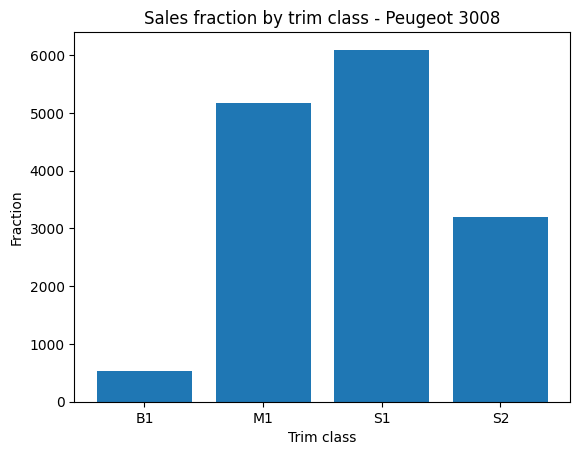

In [93]:
plt.bar(p3008_class['trim class.'], p3008_class['total_sales'])
# plt.plot(p3008_class['msrp'])
plt.title('Sales fraction by trim class - Peugeot 3008')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [94]:
nissan_juke_sales_uk = sales_uk[(sales_uk.Make=='NISSAN')&(sales_uk.Model=='NISSAN:JUKE')]

In [95]:
nissan_juke_sales_and_trim_uk=nissan_juke_sales_uk.merge(nissan,left_on='Unique Identity',right_on='UID', how='left')

In [96]:
nissan_juke_sales_and_trim_uk=nissan_juke_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [97]:
nj_class = nissan_juke_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [98]:
nj_class

,trim class.,total_sales,msrp
0,B1,411,20410.000000
2,M1,6361,22760.000000
3,M2,19940,25266.000000
4,M3,21095,26621.428571
1,L1,8383,28186.666667


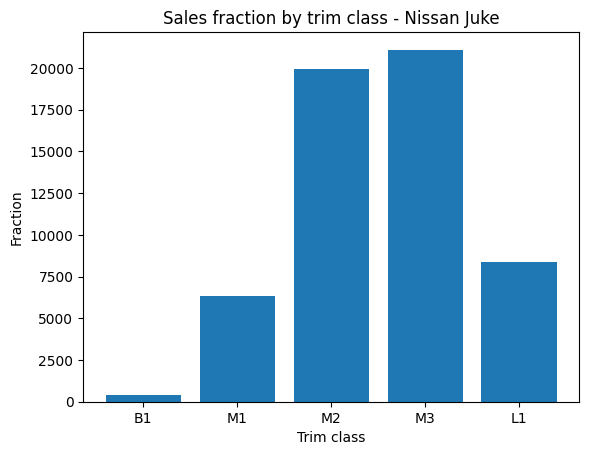

In [99]:
plt.bar(nj_class['trim class.'], nj_class['total_sales'])
plt.title('Sales fraction by trim class - Nissan Juke')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [100]:
mazda_cx30_sales_uk = sales_uk[(sales_uk.Make=='MAZDA')&(sales_uk.Model=='MAZDA:CX-30')]

In [101]:
mazda_cx30_sales_and_trim_uk=mazda_cx30_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [102]:
mazda_cx30_sales_and_trim_uk=mazda_cx30_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [103]:
mcx30_class = mazda_cx30_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [104]:
mcx30_class['msrp'] = round(mcx30_class['msrp'],0)

In [105]:
mcx30_class = mcx30_class.astype(str)

In [106]:
mcx30_class['new'] = mcx30_class['trim class.']+ ' '+'(' +mcx30_class['msrp']+')'

In [107]:
mcx30_class['total_sales'] = mcx30_class['total_sales'].astype(int)

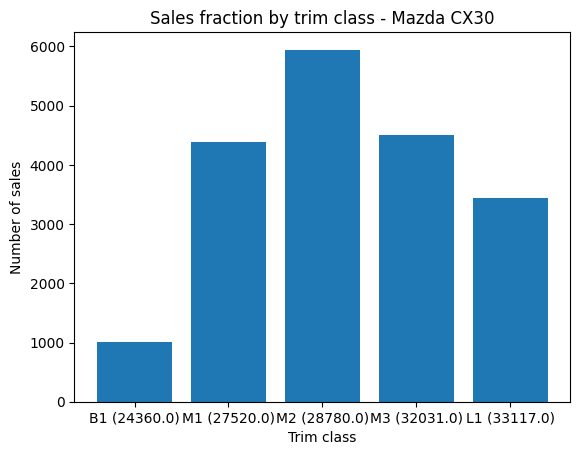

In [108]:
plt.bar(mcx30_class['new'], mcx30_class['total_sales'])
plt.title('Sales fraction by trim class - Mazda CX30')
plt.xlabel('Trim class')
plt.ylabel('Number of sales')
plt.show()

In [137]:
toyota_rav4_sales_uk = sales_uk[(sales_uk.Make=='TOYOTA')&(sales_uk.Model=='TOYOTA:RAV4')]

In [138]:
toyota_rav4_sales_and_trim_uk=toyota_rav4_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [139]:
toyota_rav4_sales_and_trim_uk=toyota_rav4_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [145]:
trav4_class = toyota_rav4_sales_and_trim_uk.groupby('trim class.').agg({'Model_x':'first','total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [146]:
trav4_class 

,trim class.,Model_x,total_sales,msrp
0,B1,TOYOTA:RAV4,1784,34389.000000
1,M1,TOYOTA:RAV4,9498,38123.000000
2,M2,TOYOTA:RAV4,13492,41108.000000
3,M3,TOYOTA:RAV4,11959,42498.285714


In [147]:
def get_sales_per_trim(make,model):
    model_sales = sales_uk[(sales_uk.Make==make)&(sales_uk.Model==model)]
    model_sales_and_trim = model_sales.merge(df,left_on='Unique Identity',right_on='UID', how='left')
    model_sales_and_trim = model_sales_and_trim[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]
    model_class = model_sales_and_trim.groupby('trim class.').agg({'Model_x':'first','total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')
    return model_class

In [160]:
nxt=get_sales_per_trim('NISSAN','NISSAN:X-TRAIL')

In [161]:
nxt

,trim class.,Model_x,total_sales,msrp
1,M2,NISSAN:X-TRAIL,19,38395.0
2,M3,NISSAN:X-TRAIL,261,41715.0
0,L1,NISSAN:X-TRAIL,10,41890.0


In [162]:
tr4=get_sales_per_trim('TOYOTA','TOYOTA:RAV4')

In [163]:
tr4

,trim class.,Model_x,total_sales,msrp
0,B1,TOYOTA:RAV4,1784,34389.000000
1,M1,TOYOTA:RAV4,9498,38123.000000
2,M2,TOYOTA:RAV4,13492,41108.000000
3,M3,TOYOTA:RAV4,11959,42498.285714


In [167]:
sk=get_sales_per_trim('SKODA','SKODA:KODIAQ')

In [168]:
sk

,trim class.,Model_x,total_sales,msrp
0,B1,SKODA:KODIAQ,427,34847.500000
2,M1,SKODA:KODIAQ,1040,39074.000000
3,S1,SKODA:KODIAQ,5129,42255.833333
1,L1,SKODA:KODIAQ,1439,44283.750000


In [169]:
hcrv=get_sales_per_trim('HONDA','HONDA:CR-V')

In [170]:
hcrv

,trim class.,Model_x,total_sales,msrp
0,B1,HONDA:CR-V,33,31420.0
2,M1,HONDA:CR-V,2594,34095.0
3,M2,HONDA:CR-V,6562,35685.0
1,L1,HONDA:CR-V,6279,39515.0


In [171]:
pd.concat([nxt,tr4,sk,hcrv])

,trim class.,Model_x,total_sales,msrp
0,B1,TOYOTA:RAV4,1784,34389.000000
1,M1,TOYOTA:RAV4,9498,38123.000000
2,M2,TOYOTA:RAV4,13492,41108.000000
3,M3,TOYOTA:RAV4,11959,42498.285714
1,M2,NISSAN:X-TRAIL,19,38395.000000
2,M3,NISSAN:X-TRAIL,261,41715.000000
0,L1,NISSAN:X-TRAIL,10,41890.000000
0,B1,SKODA:KODIAQ,427,34847.500000
2,M1,SKODA:KODIAQ,1040,39074.000000
3,S1,SKODA:KODIAQ,5129,42255.833333


In [180]:
# sales_uk.Model

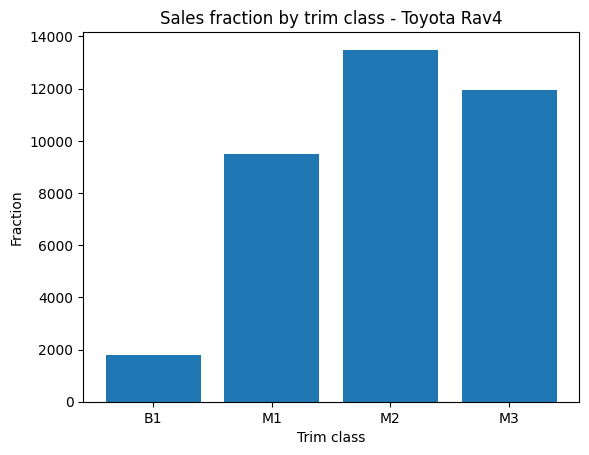

In [114]:
plt.bar(trav4_class['trim class.'], trav4_class['total_sales'])
plt.title('Sales fraction by trim class - Toyota Rav4')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [115]:
sales_by_type = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('type').sum().reset_index()

/var/folders/dl/9lzg8y6s5kz9st666f8z05lw0000gn/T/ipykernel_516/643353335.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_type = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('type').sum().reset_index()


In [116]:
sales_by_type

,type,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov,total_sales,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
0,BEV,3209205851,469,257,1623,492,617,680,934,2381,4889,1465,3295,3853,2418,1437,8460,1166,1535,4229,2974,2631,10602,3849,5912,14270,3412,2064,14614,5011,7687,11880,5564,3969,20316,9249,13847,21105,9665,7460,28965,8042,9510,17484,8191,7667,30143,13988,24013,364284,3209205851,573,1852,0.0,76983,104666,12165.0,21505.0,1969,166785.0,0.0,68390.0,2915.4,16872,1406,3262.0,3964.05,726195.0,63,1763822.0,21541651.00
1,EREV,58342986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,203,1498,1876,58342986,23,35,10.5,1014,1376,1795.0,385.0,35,2700.0,21.0,1350.0,71.5,252,28,46.0,61.50,11921.0,0,31485.0,264865.00
2,FCEV,16367468,0,0,1,1,5,0,0,1,0,1,2,1,0,1,5,0,0,6,0,0,1,0,0,0,0,0,1,3,0,2,0,0,1,1,2,2,0,0,4,0,0,0,2,0,1,1,0,45,16367468,3,9,0.0,254,345,510.0,110.0,10,695.0,0.0,354.0,18.5,180,8,22.0,24.60,3774.0,0,9645.0,118070.00
3,HEV,1758000139,2187,1070,5366,3353,3480,3489,3115,1720,6011,2673,2119,1569,3246,1664,5588,13,248,4076,6235,2972,14067,6373,3771,3511,2842,1741,12906,7891,9461,12388,9593,5311,14194,5181,5115,5653,9196,5141,18744,10988,11686,12849,11178,6719,21257,11987,11020,310957,1758000139,1001,1038,438.2,28684,39020,46050.0,11880.0,1095,25729.0,880.0,39679.0,1997.9,18840,854,1691.0,1774.40,334337.0,46,974648.0,8332294.30
4,MHEV,10431539407,8852,3978,23473,10783,10924,12038,8286,5398,29673,13917,13692,13389,17743,7934,26474,251,2020,13241,14728,7142,27291,11583,10141,12275,11126,5662,35378,16896,17468,23313,16026,9673,26533,12421,9302,9855,13473,7279,37737,22438,20558,23424,20784,10031,40628,22459,22065,739755,10431539407,4139,5968,2534.8,202920,275810,433685.0,71280.0,6536,472316.0,5597.0,279025.0,10514.9,49656,4998,12127.0,12903.45,2181178.0,673,5958567.0,60200847.13
5,PHEV,3272291186,438,339,2191,746,683,662,671,465,2916,2029,2947,3044,2692,802,2563,53,428,2329,3510,1481,4822,3268,3581,4620,2990,1695,9536,5922,5473,6899,6790,3328,9208,5717,6605,4796,5391,2999,11705,4593,5071,5801,5626,3493,12655,9377,10196,193146,3272291186,1140,1942,771.4,91837,124882,161670.0,22055.0,2021,197526.0,1715.0,87760.0,2589.1,15936,1604,3866.0,4337.20,793293.0,161,1884369.0,23019795.13
6,combustion,18059498629,19824,10669,56882,29171,30574,30480,19230,13739,49606,26473,32640,32030,27116,14504,44986,481,4143,26995,36016,17703,57710,22446,20746,25828,22601,13465,67327,43884,44818,46029,33129,18879,54504,23630,25368,23695,32979,15780,70349,43817,46286,51455,45139,28966,86083,54103,55948,1598226,18059498629,6371,10505,4165.8,318783,433453,580720.0,125565.0,11371,720511.0,9240.0,486673.0,19808.5,91500,8630,17382.0,17724.40,3310388.0,1090,10197497.0,90421547.71


In [117]:
ev_sales = sales_by_type[sales_by_type.type!='combustion'].sum().values[2:49]

In [118]:
ev_sales_index = sales_by_type[sales_by_type.type!='combustion'].sum().index[2:49]

In [119]:
combustion_sales=sales_by_type[sales_by_type.type == 'combustion'].values[0][2:49]

In [120]:
combustion_sales_index=sales_by_type[sales_by_type.type == 'combustion'].columns[2:49]

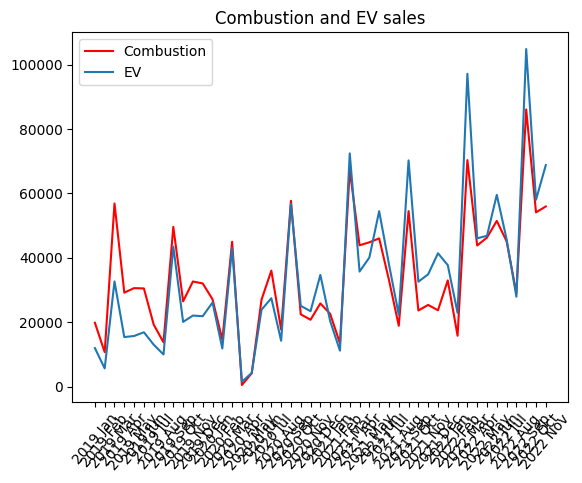

In [121]:
plt.title('Combustion and EV sales')
plt.plot(combustion_sales_index,combustion_sales,'r', label='Combustion')
plt.plot(ev_sales_index,ev_sales, label='EV')
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=50)
plt.legend()
plt.show()

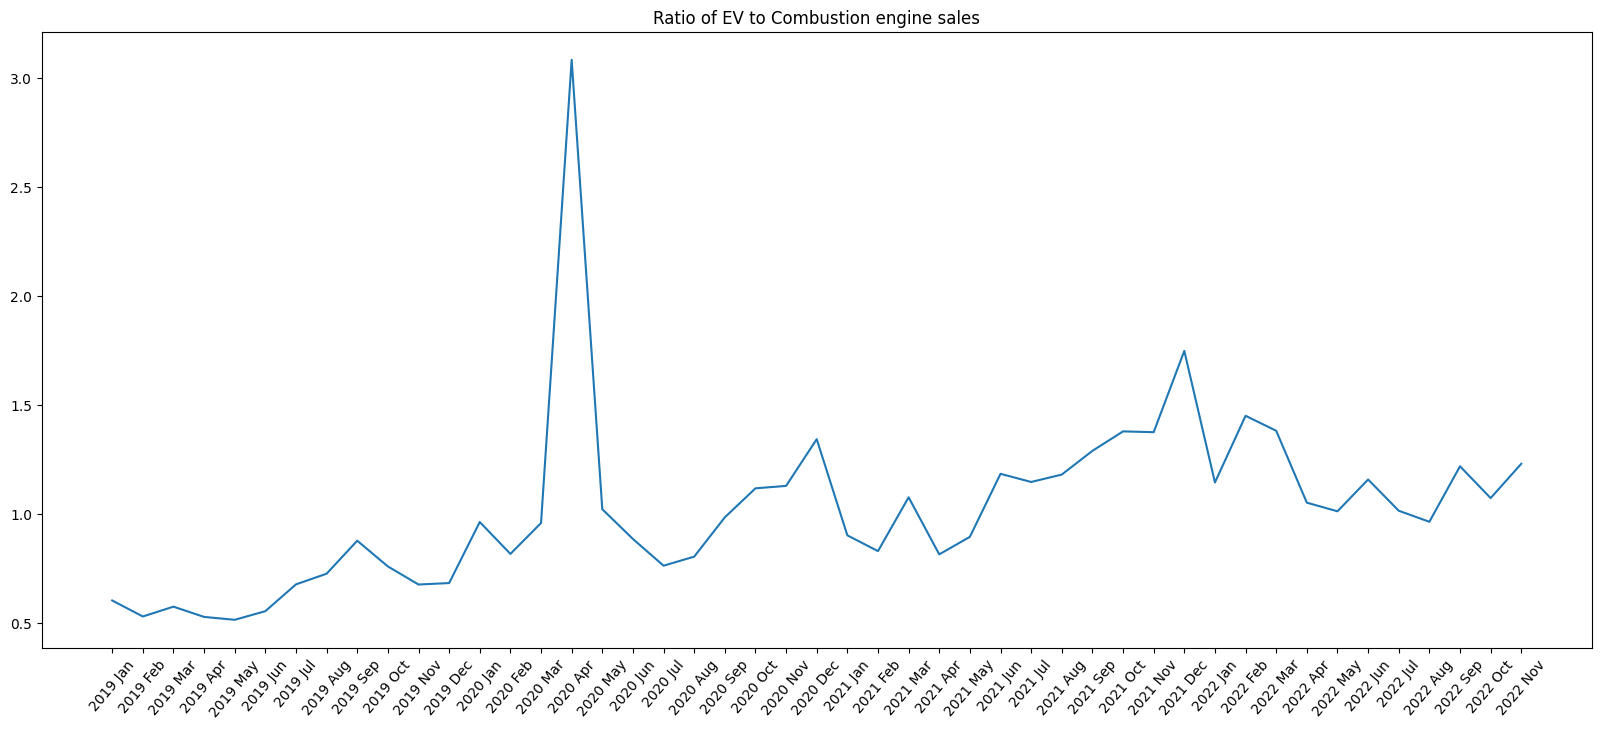

In [122]:
plt.title('Ratio of EV to Combustion engine sales')
plt.plot(ev_sales_index,ev_sales/combustion_sales)
plt.xticks(rotation=50)
plt.show()

In [123]:
sales_by_trim_class = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('trim class.').sum().reset_index()

/var/folders/dl/9lzg8y6s5kz9st666f8z05lw0000gn/T/ipykernel_516/1597384952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_trim_class = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('trim class.').sum().reset_index()


In [124]:
sales_by_type

,type,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov,total_sales,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
0,BEV,3209205851,469,257,1623,492,617,680,934,2381,4889,1465,3295,3853,2418,1437,8460,1166,1535,4229,2974,2631,10602,3849,5912,14270,3412,2064,14614,5011,7687,11880,5564,3969,20316,9249,13847,21105,9665,7460,28965,8042,9510,17484,8191,7667,30143,13988,24013,364284,3209205851,573,1852,0.0,76983,104666,12165.0,21505.0,1969,166785.0,0.0,68390.0,2915.4,16872,1406,3262.0,3964.05,726195.0,63,1763822.0,21541651.00
1,EREV,58342986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,203,1498,1876,58342986,23,35,10.5,1014,1376,1795.0,385.0,35,2700.0,21.0,1350.0,71.5,252,28,46.0,61.50,11921.0,0,31485.0,264865.00
2,FCEV,16367468,0,0,1,1,5,0,0,1,0,1,2,1,0,1,5,0,0,6,0,0,1,0,0,0,0,0,1,3,0,2,0,0,1,1,2,2,0,0,4,0,0,0,2,0,1,1,0,45,16367468,3,9,0.0,254,345,510.0,110.0,10,695.0,0.0,354.0,18.5,180,8,22.0,24.60,3774.0,0,9645.0,118070.00
3,HEV,1758000139,2187,1070,5366,3353,3480,3489,3115,1720,6011,2673,2119,1569,3246,1664,5588,13,248,4076,6235,2972,14067,6373,3771,3511,2842,1741,12906,7891,9461,12388,9593,5311,14194,5181,5115,5653,9196,5141,18744,10988,11686,12849,11178,6719,21257,11987,11020,310957,1758000139,1001,1038,438.2,28684,39020,46050.0,11880.0,1095,25729.0,880.0,39679.0,1997.9,18840,854,1691.0,1774.40,334337.0,46,974648.0,8332294.30
4,MHEV,10431539407,8852,3978,23473,10783,10924,12038,8286,5398,29673,13917,13692,13389,17743,7934,26474,251,2020,13241,14728,7142,27291,11583,10141,12275,11126,5662,35378,16896,17468,23313,16026,9673,26533,12421,9302,9855,13473,7279,37737,22438,20558,23424,20784,10031,40628,22459,22065,739755,10431539407,4139,5968,2534.8,202920,275810,433685.0,71280.0,6536,472316.0,5597.0,279025.0,10514.9,49656,4998,12127.0,12903.45,2181178.0,673,5958567.0,60200847.13
5,PHEV,3272291186,438,339,2191,746,683,662,671,465,2916,2029,2947,3044,2692,802,2563,53,428,2329,3510,1481,4822,3268,3581,4620,2990,1695,9536,5922,5473,6899,6790,3328,9208,5717,6605,4796,5391,2999,11705,4593,5071,5801,5626,3493,12655,9377,10196,193146,3272291186,1140,1942,771.4,91837,124882,161670.0,22055.0,2021,197526.0,1715.0,87760.0,2589.1,15936,1604,3866.0,4337.20,793293.0,161,1884369.0,23019795.13
6,combustion,18059498629,19824,10669,56882,29171,30574,30480,19230,13739,49606,26473,32640,32030,27116,14504,44986,481,4143,26995,36016,17703,57710,22446,20746,25828,22601,13465,67327,43884,44818,46029,33129,18879,54504,23630,25368,23695,32979,15780,70349,43817,46286,51455,45139,28966,86083,54103,55948,1598226,18059498629,6371,10505,4165.8,318783,433453,580720.0,125565.0,11371,720511.0,9240.0,486673.0,19808.5,91500,8630,17382.0,17724.40,3310388.0,1090,10197497.0,90421547.71


In [125]:
sales_index = sales_by_trim_class[sales_by_trim_class['trim class.']=='B1'].columns[2:49]
tot_sales = sales_by_trim_class.sum().values[2:49]
b1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='B1'].values[0][2:49]
m1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M1'].values[0][2:49]
m2_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M2'].values[0][2:49]
m3_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M3'].values[0][2:49]
l1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='L1'].values[0][2:49]
s1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='S1'].values[0][2:49]

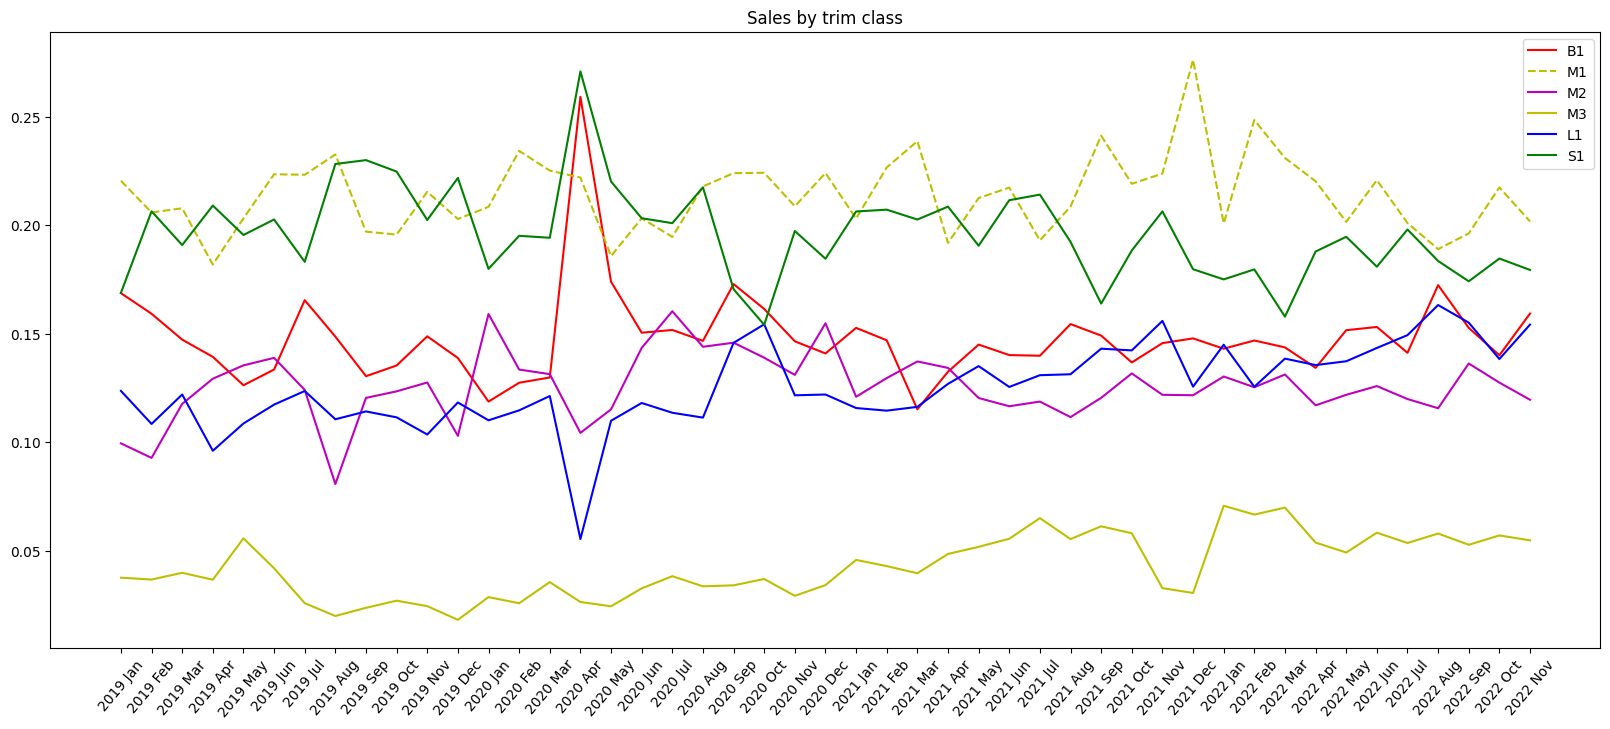

In [126]:
plt.title('Sales by trim class')
plt.plot(sales_index,b1_sales/tot_sales,'r', label='B1')
plt.plot(sales_index,m1_sales/tot_sales,'y--', label='M1')
plt.plot(sales_index,m2_sales/tot_sales, 'm', label='M2')
plt.plot(sales_index,m3_sales/tot_sales,'y', label='M3')
plt.plot(sales_index,l1_sales/tot_sales,'b', label='L1')
plt.plot(sales_index,s1_sales/tot_sales,'g', label='S1')
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=50)
plt.legend()
plt.show()

In [127]:
nissan_juke_sales_uk = sales_uk[(sales_uk.Make=='NISSAN')&(sales_uk.Model=='NISSAN:JUKE')]

In [128]:
nissan_juke_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('heated.1')['msrp'].mean()

heated.1
no:no      23151.428571
yes:yes    27343.846154
Name: msrp, dtype: float64

In [176]:
!pip install dython

In [177]:
!python --version

Python 3.9.13


In [172]:
!pip install scipy

In [174]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=0160d270472aba88ea00339a35e830b3ac68aad65aa804e4a927d7ea3bd45c17
  Stored in directory: /Users/julianlewitt/Library/Caches/pip/wheels/03/8b/6f/9f13c705de81a6b351b718b3cf917e41ad7c0933c8630d4dd4
Successfully built sklearn


In [179]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [178]:
import dython

ModuleNotFoundError: No module named 'dython'

In [132]:
!pip install requests

In [133]:
import requests

In [134]:
!pip install nltk

In [135]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [ ]:
# Nissan X trail

In [136]:
sales_by_trim_class

,trim class.,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov,total_sales,UID,Model gener,Doors,Liters,kW,hp/PS,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
0,B1,6515453301,5345,2595,13159,6197,5836,6308,5304,3520,12140,6300,8138,7478,6313,3356,11417,509,1456,7651,9616,4679,19774,7650,6454,8499,6525,3597,16010,10470,12194,13962,9850,6303,18379,7603,8726,9591,10038,5451,22952,11940,14021,16266,12731,9701,27634,15452,19080,458170,6515453301,2309,3664,1396.1,126914,172527,201490.0,44770.0,4004,265321.0,3004.0,167890.0,6976.9,36408,3058,6209.0,5959.75,1290477.0,367,3700749.0,36773507.16
1,L1,5919389131,3919,1768,10902,4274,5022,5545,3963,2619,10629,5189,5666,6375,5855,3021,10666,109,920,6006,7200,3552,16677,7315,5359,7358,4948,2804,16165,10028,11361,12500,9219,5360,17637,7911,9339,8150,10166,4660,22126,12053,12698,15238,13465,9186,28069,15262,18471,416725,5919389131,2093,3487,1301.5,118116,160570,201360.0,40590.0,3764,254276.0,2827.0,150553.0,6158.3,32208,2788,7060.0,6754.30,1186286.0,328,3317101.0,34825965.38
2,M1,6518788783,6984,3355,18566,8087,9389,10557,7155,5506,18334,9106,11778,10926,11080,6168,19792,436,1555,10330,12333,6947,25618,10622,9194,13508,8677,5545,33169,15157,17870,21643,13590,8512,29725,12176,13403,17913,14087,9218,36881,19580,18632,23448,18117,10634,35511,23978,24161,678953,6518788783,2214,3846,1204.2,103776,141102,184290.0,44880.0,4163,243603.0,2827.0,162551.0,7535.2,35892,3068,6057.0,6429.40,1263983.0,303,3658806.0,29994073.72
3,M2,3735559470,3153,1513,10517,5750,6259,6562,3979,1913,11211,5746,6975,5548,8457,3516,11552,205,964,7295,10163,4592,16686,6586,5773,9336,5170,3171,19073,10609,10126,11615,8363,4555,14847,7322,7300,7893,9140,4652,20958,10405,11269,13374,10812,6511,24666,14063,14324,404469,3735559470,1261,2208,750.1,66300,90112,119710.0,25630.0,2366,152541.0,1734.0,95147.0,4072.2,20304,1766,3994.0,4389.10,726628.0,181,2100554.0,19733387.26
4,M3,1952751384,1193,600,3566,1633,2578,1984,831,474,2213,1260,1343,984,1527,682,3133,52,205,1664,2431,1074,3906,1756,1291,2065,1959,1052,5517,3840,4361,5538,4583,2262,7557,3230,1968,1986,4965,2476,11170,4785,4555,6201,4836,3264,9560,6299,6572,146981,1952751384,743,1192,432.6,32988,44862,57425.0,13475.0,1249,79372.0,974.0,50224.0,2132.9,10044,938,2128.0,2238.75,375978.0,98,1107109.0,9639176.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,S1,6611672441,5350,3364,17052,9295,9034,9573,5870,5402,21399,10456,11068,11945,9562,5138,17073,532,1842,10332,12733,6934,19505,7304,8692,11128,8816,5069,28154,16477,16024,21066,15075,7848,20197,10469,12360,11657,12276,6666,25216,16702,17998,19214,17850,10327,31519,20364,21484,603411,6611672441,2518,3770,1540.3,142848,194258,256995.0,45485.0,4111,316655.0,3291.0,181296.0,6078.6,32148,3218,6924.0,8024.55,1375121.0,431,3790420.0,38837374.39
10,S2,3445563320,3610,2292,9512,6249,5584,3740,2958,3007,9788,5157,6614,7663,7579,3212,9535,96,1073,5517,6808,3337,9143,4629,5304,5927,4545,2025,13277,8567,8812,10378,7643,4867,10432,5170,4804,5148,6989,2946,12858,8635,9229,8870,8658,4974,16079,9944,10783,313967,3445563320,1201,1952,826.6,80371,109293,139295.0,23595.0,2095,171430.0,1770.0,96683.0,3049.1,16188,1682,3663.0,4396.80,725715.0,184,1960458.0,21682237.35
11,S3,855655171,722,367,2839,1505,1242,914